In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [42]:
hk_df= pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
                   #hk_df_cleaned.csv")

In [43]:
numericalX = hk_df.select_dtypes(np.number)

In [44]:
numericalX.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [45]:
X = numericalX.drop('total_claim_amount', axis=1)    #total claim amount
y = numericalX.total_claim_amount

X-y split (y is the target variable, which is the total claim amount)

In [46]:
#see if need to drop any nas
numericalX.isna().any()

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
total_claim_amount               False
dtype: bool

In [47]:
RAND_STATE = 34 # for reproducible shuffling learn what this is
TT_RATIO = 0.3 # test/train
#do two notebooks, one of standard scaler, and do power transformer on another one to work off two models,
#need a step by step of this off of them, please. 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=RAND_STATE)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
2705,4786,45515,61,10,33,0,9
2209,22445,80340,71,32,35,0,2
4004,6412,58776,83,20,50,2,4


In [49]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

Standardize the data - inside train set

In [50]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

In [51]:
scalerr = StandardScaler()
X_train_scaled = scalerr.fit_transform(X_train) #never scaling target variable
X_test_scaled = scalerr.transform(X_test)
X_test_scaled

array([[ 0.14444055, -0.71004053,  0.57629933, ..., -0.137927  ,
        -0.41717964,  2.48904378],
       [-0.52212155,  0.47663896,  0.51775548, ...,  0.54149453,
        -0.41717964, -0.82274665],
       [-0.51468192,  0.26713482,  0.48848355, ...,  0.5057355 ,
        -0.41717964, -0.82274665],
       ...,
       [-0.12567519,  1.43123929, -0.12622686, ...,  1.43547023,
        -0.41717964,  1.24712237],
       [-0.7420198 ,  0.78648094, -0.56530573, ...,  1.04212092,
         5.19673778, -0.82274665],
       [-0.80196604, -0.8159415 , -0.91656882, ..., -0.67431241,
        -0.41717964, -0.82274665]])

Applying linear regression

In [12]:
#X_train_const_scaled = sm.add_constant(X_train_scaled.to_numpy()) # adding a constant

#model = sm.OLS(y_train, X_train_const_scaled).fit() #this finds the beta and the coefficient - the parameters 
#predictions_train = model.predict(X_train_scaled)
#puts into model into the equation so can get predictions so can compare to real value

#X_test = sm.add_constant(X_test) # adding a constant means adding the intercept, giving it a constant
#predictions_test = model.predict(X_test_const_scaled)
#print_model = model.summary()
#print(print_model)
#work on below, seriously relearn this. with Matthias. alwats you stats lib for linear regression

X_train_const = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const).fit() #this finds the beta and the coefficient - the paremeters 
predictions_train = model.predict(X_train_const) #

X_test_const = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const) #
print_model = model.summary()

In [13]:
print_model

In [52]:
y_train

2705     236
2209     511
4004     478
1898     768
10016    450
        ... 
5667     712
324      806
3157      35
5993     422
5242     552
Name: total_claim_amount, Length: 7482, dtype: int64

Apply linear regression.

In [15]:
#y_train.shape

In [16]:
#y_train = np.asarray(y_train).reshape(1,-1)

In [53]:
model=LinearRegression()    # scaling before model. need to teach this shit to Matthias!
fitted_model = model.fit(X_train_scaled, y_train)   # model train

Model Parameters

In [54]:
fitted_model.coef_

array([-5.99598283e+00, -3.17043664e+01,  1.87098365e+02,  2.05563615e+00,
       -6.47737048e-01, -5.95820844e-01, -1.54903758e-01])

In [55]:
fitted_model.intercept_

435.8294573643411

In [56]:
y_pred = pd.DataFrame(model.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
#y_pred_train =  pd.DataFrame(model.predict(X_train_scaled),columns = ['total_claim_amount'])
#normal distribution for errors is how it should be for error distribution


In [38]:
fitted_model.summary() #find a way to summarise


AttributeError: 'LinearRegression' object has no attribute 'summary'

### Model Validation
#### Model Evaluation:
MSE.

RMSE.

MAE.

R2.

Adjusted R2.

Feature Importance.

#### Model Iteration (Wednesday and Thursday)

Please rerun the model after adding the hot encoded categorical variables as well as other numeric categorical variables (e.g. number of open complaintes).

(Optional) Please rerun the model after removing the outliers and compare the results using R2 metric.

In [69]:
y_pred = pd.DataFrame(model.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
y_pred_train = pd.DataFrame(model.predict(X_train_scaled),columns = ['total_claim_amount'])

In [73]:
result=pd.DataFrame({'y_test_scaled': list(y_test_scaled),'y_pred_scaled': list(y_pred_scaled)})

NameError: name 'y_test_scaled' is not defined

C:\Users\Poppy Nevin\Documents\Ananconda\lib\site-packages\matplotlib\axes\_axes.py:6607: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\Poppy Nevin\Documents\Ananconda\lib\site-packages\matplotlib\axes\_axes.py:6608: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

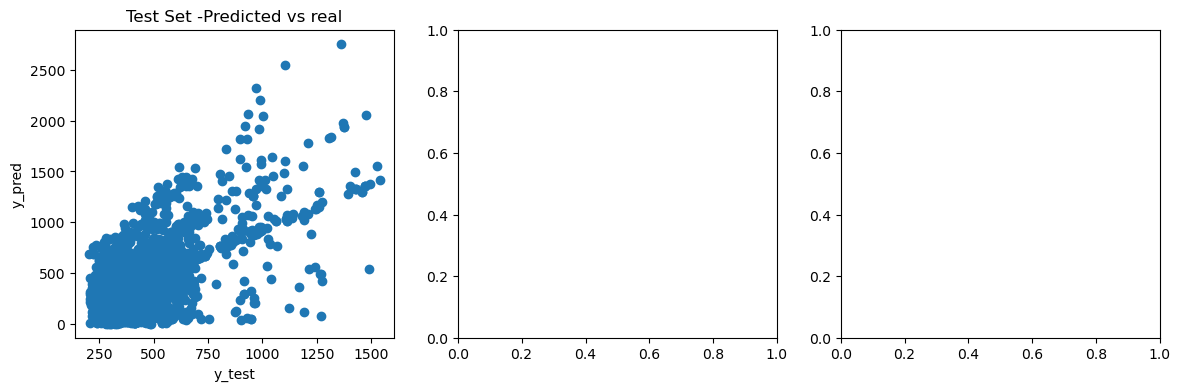

In [71]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_pred.to_numpy()-y_test.to_numpy(),"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

C:\Users\Poppy Nevin\Documents\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

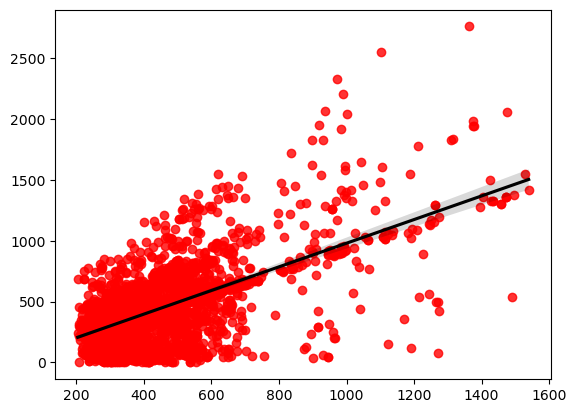

In [72]:
yp_ = y_pred.to_numpy()
yt_ = y_test.to_numpy()
sns.regplot(yp_,yt_,scatter_kws={"color": "red"}, line_kws={"color": "black"})